#Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
from itertools import permutations
import codecs
import itertools

#Classes used

In [27]:
class traveling_salesman:

  def __init__(self,n,bounds,costs=None):

    self.n = n
    self.bounds = bounds
    if costs is None:
      self.create_costs() 
    else:
      if len(costs[0]) is n and len(costs) is n:
        self.costs = costs
      else:
        raise Exception('Verify if the cost size is correct in relation to the route passed through the parameters.')
  
  def create_costs(self):

    costs = []

    for i in range(self.n):
      row = []
      for j in range(self.n):
        row.append(round(random.uniform(self.bounds[0],self.bounds[1]),2))
      
      costs.append(row)
    
    self.costs =  costs

  def hill_climbing(self,route):

      [all_routes,all_costs,improved,iteration] = [[],[],True,0]

      old_route = route.copy()
      old_cost = self.calculate_cost(old_route)
      new_route = old_route

      all_routes.append(old_route)
      all_costs.append(old_cost)

      while(improved):
        
        [new_route,new_cost] = self.swap_2_first(old_route,False) 
        
        if new_cost < old_cost:

          old_route = new_route
          old_cost = new_cost
          
          all_routes.append(old_route)
          all_costs.append(round(old_cost,2))

          iteration+=1
        
        else:
          improved = False
          

      return [all_costs,all_routes,iteration]

  def brute_force(self):

    current_cost = float('inf')
    current_route = []

    for route in itertools.permutations(range(self.n)):
      
      route = route + (route[0],)  # Route is a tuple.

      new_cost = self.calculate_cost(route)

      if new_cost < current_cost:

        current_cost = new_cost
        current_route = route

    return [current_route,current_cost]

  def generate_one_random_solution(self):

    solution = [vertex for vertex in range(self.n)]
    solution = random.sample(solution,self.n)
    solution.append(solution[0])

    return solution

  def greedy(self, initial_vertice = None):

    solution = [initial_vertice if initial_vertice is not None else randint(0,self.n-1)]
    [available_nodes,current_node,new_cost] = [[i for i in range(0,self.n)],solution[0],0]

    available_nodes.remove(current_node)
    
    for i in range(0,self.n-1):

      available_node_costs = [self.costs[current_node][j] for j in available_nodes]
      
      next_node = available_nodes[available_node_costs.index(min(available_node_costs))]
      #numpy argmin
      solution.append(next_node)
      new_cost += self.costs[current_node][next_node]

      available_nodes.remove(next_node)
      current_node = next_node

    solution.append(solution[0])
    new_cost+=self.costs[next_node][solution[0]]

    return solution,new_cost

  def calculate_cost(self,solution):
    
    sum = 0
    for i in range(1,len(solution)):

      sum += self.costs[solution[i-1]][solution[i]]
    
    return sum

  def swap_2_first(self,route = None,warning_condition=True):

    # Swap 2 vertices until finding a better solution. 
    solution = route.copy() if route is not None else self.generate_one_random_solution()

    current_cost = self.calculate_cost(solution)

    for i in range(self.n-1):

      for j in range(i+1,self.n):

        new_solution = solution.copy()
        
        aux = new_solution[j]
        new_solution[j] = new_solution[i] #swap
        new_solution[i] = aux

        new_solution[self.n] = new_solution[0]

        new_cost = self.calculate_cost(new_solution)
        
        if new_cost < current_cost:  
          solution = new_solution
          current_cost = new_cost
          return [solution,current_cost]
      
      if warning_condition: print('\n swap warning: Não foi encontrado nenhuma solução melhor, retornando o original\n')
      return [solution,current_cost]

  def vnd(self,route,delta,max_iteration):

    old_cost = self.calculate_cost(route)
    old_route = route.copy()
    counter = 0
    improvement = True
    all_cost = [old_cost]

    while(improvement and counter<max_iteration):

      counter += 1
      [current_route,current_cost] = self.swap_2_first(old_route,False)

      if current_cost + delta < old_cost:
         old_cost = current_cost
         old_route = current_route.copy()
         
         all_cost.append(old_cost)
         continue
      else:
        improvement = False

      [current_route,current_cost] = self.opt_2(old_route)

      if current_cost + delta < old_cost:
        old_cost = current_cost
        old_route = current_route.copy()
        improvement = True

        all_cost.append(old_cost)

    return [old_route,round(old_cost,3),counter,all_cost]

  
  def opt_2(self,route):

    new_route = route.copy()
    node_number = len(route)
    new_costs = simulation.calculate_cost(route)
    costs =  self.costs

    for i in range(node_number-3):

      for j in range(i+2,node_number-1):

        if costs[route[i]][route[i+1]] + costs[route[j]][route[j+1]] > costs[route[i]][route[j]]+costs[route[i+1]][route[j+1]]:

          aux = route[j]
          route[j] = route[i+1]
          route[i+1] = aux

          new_costs = simulation.calculate_cost(route)
        
    return [route,new_costs]


  def opt_2_first(self,route,warning_condition=False):

      new_route = route.copy()
      node_number = len(route)
      new_costs = simulation.calculate_cost(route)
      costs =  self.costs

      for i in range(node_number-3):

        for j in range(i+2,node_number-1):

          if costs[route[i]][route[i+1]] + costs[route[j]][route[j+1]] > costs[route[i]][route[j]]+costs[route[i+1]][route[j+1]]:

            aux = route[j]
            route[j] = route[i+1]
            route[i+1] = aux

            new_costs = simulation.calculate_cost(route)

            return [route,new_costs]
      
      if warning_condition: print('Warning: Nenhum melhoramento encontrado')
          
      return [route,new_costs]

  def random_mult_start(self,iteration_number):
    
    better_solution = self.generate_one_random_solution() 
    better_cost = self.calculate_cost(better_solution)

    for i in range(iteration_number - 1): 
      current_solution = self.generate_one_random_solution()
      current_cost = self.calculate_cost(current_solution) 
      # print('interation '+ str(i))
      # print('better_solution: ', better_solution)
      # print('better_cost: ', better_cost)
      # print('current_solution: ', current_solution)
      # print('current_cost: ', current_cost)

      if current_cost < better_cost:
        better_solution = current_solution
        better_cost = current_cost
        
    return [better_solution, better_cost]

  def iterated_local_search(self,max_iteration):

    [old_solution,old_cost] = self.random_mult_start(max_iteration)
    [improved,count] = [True,0]

    while improved and count<max_iteration:

      vnd_results = self.vnd(old_solution,0.01,max_iteration)

      [current_solution,current_cost] = [vnd_results[0],vnd_results[1]]

      if current_cost < old_cost:
        
        old_solution = current_solution
        old_cost = current_cost
      else:
        improved = False

      count+=1
    
    return [old_solution,old_cost]


def plot_vertices(route,xs,ys,node_number,line_cor = 'black',cost_text=None,cost_matrix=None):

  plt.figure(figsize=(10,6))
  #print(route)
  y_route = [ys[i] for i in route]
  plt.plot(route,y_route,line_cor)
  plt.plot(xs,ys,'ob')
  for i in range(node_number):
    plt.text(route[i]-0.2,y_route[i]+0.2,'Node '+str(route[i]))
  if cost_text is not None:
    for i in range(node_number):
      plt.text(cost_text[i][0],cost_text[i][1],str(cost_matrix[cost_text[i][2]][cost_text[i][3]]))
  plt.show()

def convex_combination_of_edges(xs,ys,alpha,node_number):

  if alpha>1 or alpha < 0: raise Exception('alpha inválido')

  edges = []
  ys = [ys[i] for i in xs]

  for i in range(node_number):

    edges.append([alpha*xs[i]+(1-alpha)*xs[i+1],alpha*ys[i]+(1-alpha)*ys[i+1],xs[i],xs[i+1]])

  return edges

#Generating a random route and calculating the distance among all dots.

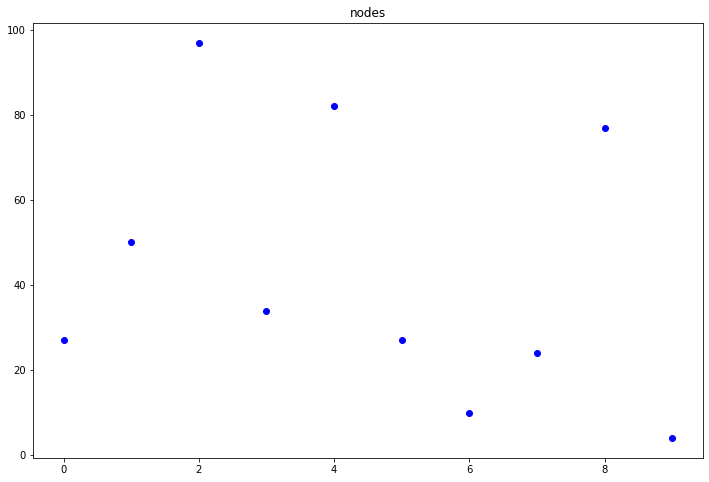

In [46]:
node_number = 10

xs = [x for x in range(node_number)]
ys = [randint(0,10*node_number) for x in range(node_number)]

calculate_distance = lambda x_dif,y_dif: (x_dif**2+y_dif**2)**(1/2)

distances = []

for i in range(node_number):
    row = []
    for j in range(node_number):
      if i is not j:
        row.append(round(calculate_distance(xs[i]-xs[j],ys[i]-ys[j]),4))
      else:
        row.append(float('inf'))
    
    distances.append(row)

plt.figure(figsize=(12,8))
plt.plot(xs,ys,'ob')
plt.title('nodes')
plt.show()


## Showing all costs and setting up the parameters.

A rota aleatoria gerada foi [0, 7, 3, 9, 4, 5, 8, 6, 1, 2, 0] e o seu custo é 456.6196


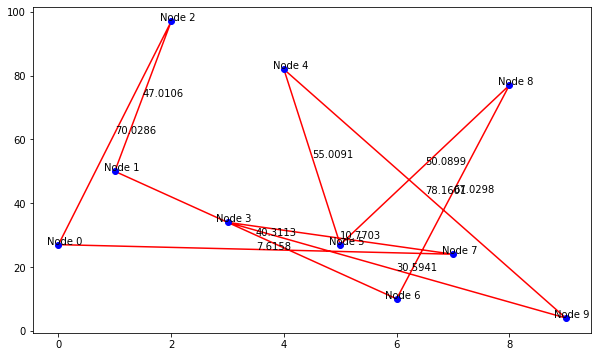

In [47]:
simulation = traveling_salesman(node_number,[10,300],distances)
initial_route = simulation.generate_one_random_solution()
#display(pd.DataFrame(simulation.costs))
print(f'A rota aleatoria gerada foi {initial_route} e o seu custo é {simulation.calculate_cost(initial_route)}')

cost_texts = convex_combination_of_edges(initial_route,ys,0.5,node_number)

plot_vertices(initial_route,xs,ys,node_number,'red',cost_text=cost_texts,cost_matrix=simulation.costs)


#Greedy

A rota gerada pela seleção do melhor caminho foi [4, 8, 2, 1, 3, 5, 7, 0, 6, 9, 4] e o seu custo é 211.82 e tbm deve ser 211.8164


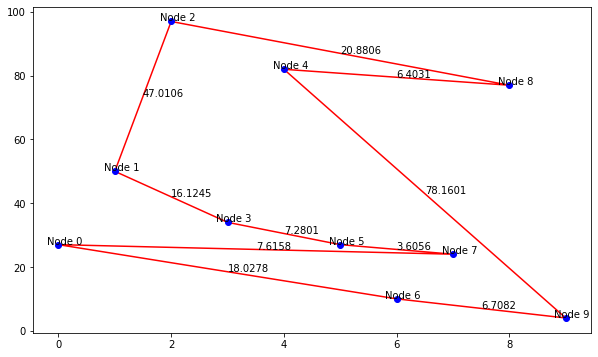

In [54]:
route_greedy,cost = simulation.greedy()
simulation.calculate_cost(route_greedy)

print(f'A rota gerada pela seleção do melhor caminho foi {route_greedy} e o seu custo é {round(simulation.calculate_cost(route_greedy),2)} e tbm deve ser {cost}')

cost_texts = convex_combination_of_edges(route_greedy,ys,0.5,node_number)

plot_vertices(route_greedy,xs,ys,node_number,'red',cost_text=cost_texts,cost_matrix=simulation.costs)



# Hill Climbing

A melhor rota por Hill Climbing com swap e 2 opt foi [8, 9, 6, 0, 7, 5, 3, 1, 4, 2, 8] e o seu custo é 200.52 e tbm deve ser 200.52
Quantidade de iterações necessárias 13


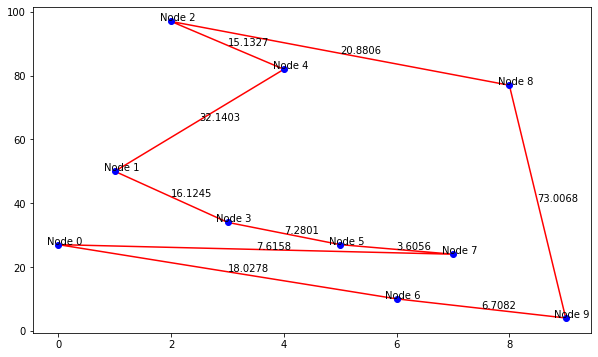

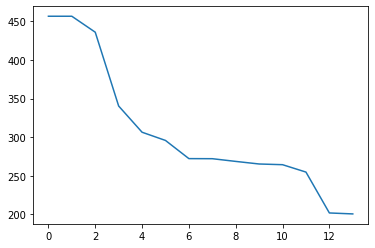

In [53]:

[all_costs,all_routes,iterations] = simulation.hill_climbing(initial_route)

best_cost = min(all_costs)
best_route = all_routes[all_costs.index(best_cost)]

print(f'A melhor rota por Hill Climbing com swap e 2 opt foi {best_route} e o seu custo é {round(simulation.calculate_cost(best_route),2)} e tbm deve ser {best_cost}')
print(f'Quantidade de iterações necessárias {iterations}')
cost_texts = convex_combination_of_edges(best_route,ys,0.5,node_number)

plot_vertices(best_route,xs,ys,node_number,'red',cost_text=cost_texts,cost_matrix=simulation.costs)


plt.plot(all_costs)
plt.show()


#VND

[8, 5, 7, 9, 6, 0, 3, 1, 4, 2, 8] 190.425 15 190.42520000000002


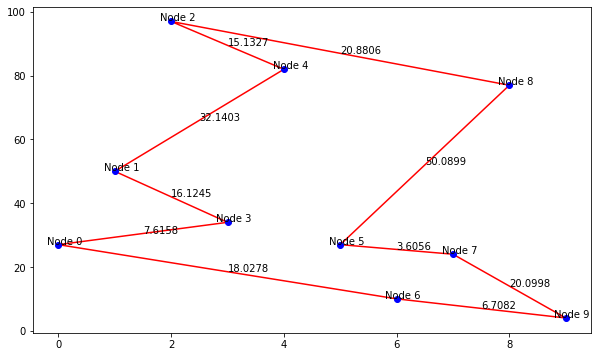

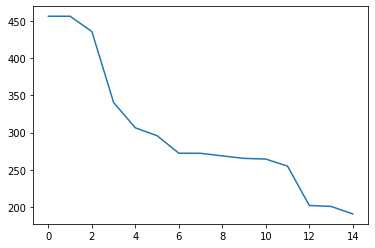

In [52]:
[vnd_route,vnd_cost,iterations,all_costs] = simulation.vnd(initial_route,0.01,100)

print(vnd_route,vnd_cost,iterations,simulation.calculate_cost(vnd_route))

cost_texts = convex_combination_of_edges(vnd_route,ys,0.5,node_number)

plot_vertices(vnd_route,xs,ys,node_number,'red',cost_text=cost_texts,cost_matrix=simulation.costs)

plt.plot(all_costs)
plt.show()

#Random multi Start

A melhor solução gerada pelo RMS foi [6, 1, 8, 2, 4, 3, 5, 9, 0, 7, 6] e o seu custo é de 229.2 


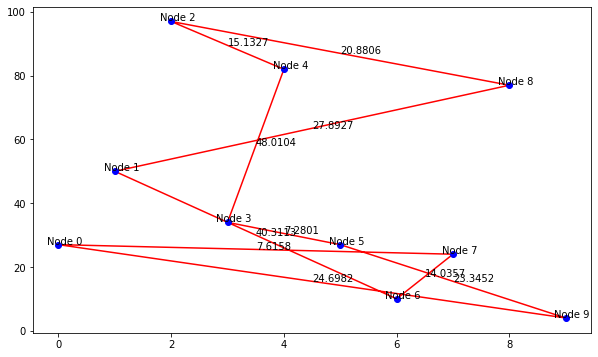

In [50]:
route_rms, cost = simulation.random_mult_start(100)

print(f'A melhor solução gerada pelo RMS foi {route_rms} e o seu custo é de {round(cost,2)} ')

cost_texts = convex_combination_of_edges(route_rms,ys,0.5,node_number)

plot_vertices(route_rms,xs,ys,node_number,'red',cost_text=cost_texts,cost_matrix=simulation.costs)


#Iterated Local Search

A melhor rota pelo ILS foi [0, 6, 9, 7, 5, 8, 2, 4, 1, 3, 0] e o seu custo é 190.425 e tbm deve ser 190.425


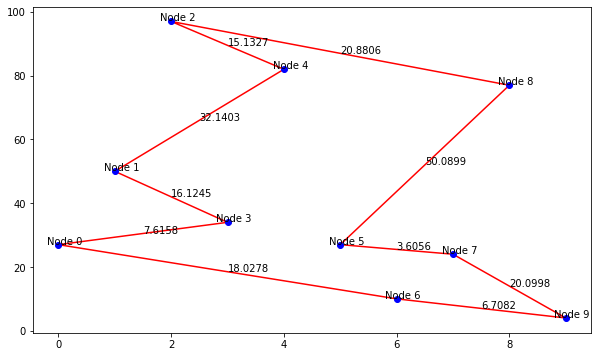

In [49]:
[ils_route,ils_cost] = simulation.iterated_local_search(100)

print(f'A melhor rota pelo ILS foi {ils_route} e o seu custo é {round(simulation.calculate_cost(ils_route),3)} e tbm deve ser {ils_cost}')


cost_texts = convex_combination_of_edges(ils_route,ys,0.5,node_number)

plot_vertices(ils_route,xs,ys,node_number,'red',cost_text=cost_texts,cost_matrix=simulation.costs)


#brute force

Warning: Be aware of the route length because if this one is larger than 13, the Brute Force method can use all your memory RAM and crash your pc.

A melhor rota por Força bruta foi (0, 6, 9, 7, 5, 3, 8, 2, 4, 1, 0) e o seu custo é 190.19 e tbm deve ser 190.1865


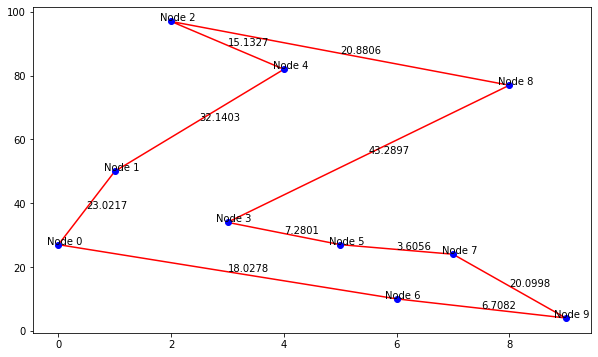

In [48]:
[best_route,best_cost] = simulation.brute_force()

print(f'A melhor rota por Força bruta foi {best_route} e o seu custo é {round(simulation.calculate_cost(best_route),2)} e tbm deve ser {best_cost}')

cost_texts = convex_combination_of_edges(best_route,ys,0.5,node_number)

plot_vertices(best_route,xs,ys,node_number,'red',cost_text=cost_texts,cost_matrix=simulation.costs)
